- To plot the light curves of artificial shapes for different Limb Darkening Coefficients
- Plot 3 shapes and their lightcurves single LDCs (overlap)
- To plot the difference between two lightcurves

In [ ]:
# check whether this ipynb is already running
a = 10
print(a)

Code to plot the light curves of artificial shapes for different Limb Darkening Coefficients

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
# train_lc = np.load(train_lc_dir)
# train_lc[0].shape[0]
# train_lc.shape[0]

In [ ]:
train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
train_lc = np.load(train_lc_dir)
same_shape_diff_LDC_lc = np.zeros((9,train_lc[0].shape[0]))
del train_lc

for i in np.arange(1,10,1):
    train_lc_dir =  f'../../data/train/npy/lc/lc_{i}_shape_5.npy'
    train_lc = np.load(train_lc_dir)
    same_shape_diff_LDC_lc[i-1] = train_lc[0]
    del train_lc


In [ ]:
# 2. Normalize the lightcurves
## - Train Set
train_lc = np.copy(same_shape_diff_LDC_lc)
del same_shape_diff_LDC_lc
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))


In [ ]:
# Add flat line towards left and right of dip
# 10 data points on each side
# 3. Extend the lightcurves
## - Train Set
train_lc_scaled_append = np.ones((train_lc.shape[0],120))
print('train_lc_scaled_append.shape = ',train_lc_scaled_append.shape)
print("len(train_lc_scaled_append[0,10:110]) = ",len(train_lc_scaled_append[0,10:110]))

for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled_append[i,10:110] = train_lc_scaled[i]

In [ ]:
plt.rcParams['figure.dpi'] = 400

# Verification
# Plot - Train LCs
fig, ax = plt.subplots()
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
for i in np.arange(0,9,1):
    ax.plot(ph_simul, train_lc_scaled_append[i],linewidth='1.5')
plt.grid('on')
plt.show()

In [ ]:
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
plt.plot(ph_simul, train_lc_scaled_append[8],linewidth='1.5')
plt.plot(ph_simul, train_lc_scaled_append[7],linewidth='1.5')

plt.grid('on')
plt.show()


Plot 3 shapes and their lightcurves single LDCs (overlap)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
train_lc = np.load(train_lc_dir)

# 2. Normalize the lightcurves
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))

# Add flat line towards left and right of dip
# 10 data points on each side
# 3. Extend the lightcurves
## - Train Set
train_lc_scaled_append = np.ones((train_lc.shape[0],120))
print('train_lc_scaled_append.shape = ',train_lc_scaled_append.shape)
print("len(train_lc_scaled_append[0,10:110]) = ",len(train_lc_scaled_append[0,10:110]))

for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled_append[i,10:110] = train_lc_scaled[i]

In [ ]:
train_shape_dir = '../../data/train/npy/shape/shape_5.npy'
train_shape = np.load(train_shape_dir)

# 2. Normalize the image, convert to opacity map
## Train Set
train_shape = train_shape/np.amax(train_shape)
train_shape_where_0 = np.where(train_shape == 0)
train_shape_where_1 = np.where(train_shape == 1)
train_shape[train_shape_where_0] = 1  # 1 represent the shape (1 opacity)
train_shape[train_shape_where_1] = 0  # 0 represent background (0 opacity)

In [ ]:
k = np.random.randint(0, len(train_lc_scaled_append)-1, 3)
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
plt.rcParams['figure.dpi'] = 400

# Create Figure 1
plt.subplot(2, 3, 1)
# plt.text(0.5, 0.5, 'Figure 1', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[0]],cmap='inferno')
plt.title('Red')
plt.axis('off')

# Create Figure 2
plt.subplot(2, 3, 2)
# plt.text(0.5, 0.5, 'Figure 2', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[1]],cmap='inferno')
plt.title('Blue')
plt.axis('off')

# Create Figure 3
plt.subplot(2, 3, 3)
# plt.text(0.5, 0.5, 'Figure 3', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[2]],cmap='inferno')
plt.title('Green')
plt.axis('off')

# Create a single figure in the second row
plt.subplot(2, 1, 2)
# plt.text(0.5, 0.5, 'Single Figure', ha='center', va='center', fontsize=12, color='black')
plt.plot(ph_simul,train_lc_scaled_append[k[0]],color='tab:red')
plt.plot(ph_simul,train_lc_scaled_append[k[1]],color='tab:blue')
plt.plot(ph_simul,train_lc_scaled_append[k[2]],color='tab:green')
plt.grid('on')
plt.title('Transit Light Curves')
plt.ylabel('Flux')
plt.xlabel('Phase (arbitary units)')
# plt.axis('off')

# Adjust layout to make sure there is no overlapping
plt.tight_layout()

# Show the plot
plt.show()

**To plot the difference between two lightcurves**


Load BATMAN lightcurve

In [ ]:
import batman
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400


In [ ]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.2185                      #planet radius (in units of stellar radii)
params.a = 20.                        #semi-major axis (in units of stellar radii)
params.inc = 90.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.027, 0.027, 2000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

batman_flux = m.light_curve(params)                    #calculates light curve

# Normalize light curve
batman_flux_scaled = np.copy(batman_flux)
batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

batman_phase = np.linspace(-1,1,len(batman_flux_scaled))
plt.plot(batman_phase,batman_flux_scaled)
plt.grid('on')
plt.show()

In [ ]:
# Cut light curve

# flux_scaled_mask used to select the flat part by certain percentage
batman_flux_scaled_mask = np.copy(batman_flux_scaled)

batman_flux_scaled_mask[batman_flux_scaled_mask>=0.98] = 1.0
batman_flux_scaled_mask[batman_flux_scaled_mask<0.98] = 0.0

print("Length of batman lc = ",len(batman_flux_scaled_mask))

count_zeros = np.count_nonzero(batman_flux_scaled_mask == 0)  

center_index = int(len(batman_flux_scaled)/2)
print("center_index = ",center_index)

left_index = int(center_index - int(count_zeros/2)-int(count_zeros/6)) 
right_index = int(center_index + int(count_zeros/2)+int(count_zeros/6))
print("left_index = ",left_index)
print("right_index = ",right_index)
batman_lc_test = batman_flux_scaled[left_index:right_index] # Cut light curve
print("Length of cut light curve: batman_lc_test = ",len(batman_lc_test))
plt.plot(np.linspace(-1,1,len(batman_lc_test)),batman_lc_test,label='Batman LC',color="tab:red")
# ax.scatter(np.linspace(-1,1,len(train_lc_scaled_append[0])),train_lc_scaled_append[0],label='Simulated LC',color="tab:red",s=1)

plt.grid('on')
plt.show()

Load 8bitTransit circle light curve (manual made using paintz)

In [ ]:
# 8bit_lc
# 1. Load Lightcurve Dataset
lc_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_14Feb2024_circle_38_38_px.npy'
test_lc = np.load(lc_dir)

# Normalize the lightcurves
## - Test Set
test_lc_scaled = np.zeros(test_lc.shape)
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled[i] = (test_lc[i] - np.amin(test_lc[i]))/(np.amax(test_lc[i]) - np.amin(test_lc[i]))

# Append with ones
## - Test Set
test_lc_scaled_append = np.ones((test_lc.shape[0],120))
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled_append[i,10:110] = test_lc_scaled[i]
print("Extended the light curves")

lc_8bit = test_lc_scaled_append[0]

plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit,label='8bit')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid('on')
plt.show()

Plot the difference of both the light curve

In [ ]:
plt.plot(np.linspace(-1,1,len(batman_lc_test)),batman_lc_test,label='Batman LC',color="tab:red")
plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit,label='8bit')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid('on')
plt.show()

In [ ]:
# Downsample BATMAN light curve to match 8bit light curve's length
def down_sample(to_down_sample_lc):
        new_length = 120 # New length of that light curve array
        to_down_sample = to_down_sample_lc
        dwn_sample_idx = np.round(np.linspace(0, len(to_down_sample_lc) - 1, new_length)).astype(int)
        down_sample_lc = to_down_sample[dwn_sample_idx]
        return down_sample_lc

batman_lc_test_sampled = down_sample(batman_lc_test)
print('length = ',len(batman_lc_test_sampled))
plt.plot(np.linspace(-1,1,len(batman_lc_test_sampled)),batman_lc_test_sampled,label='batman',color='blue')

plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit,label='8bit (pixelated circle)',color='tab:red')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Flux")
plt.xlabel("Phase")
plt.grid('on')
plt.show()

In [ ]:
plt.title("Difference between light curves \n 8bit(pixelated circle) - BATMAN")
plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit-batman_lc_test_sampled,label='8bit - BATMAN')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Flux")
plt.xlabel("Phase")
plt.grid('on')
plt.show()

MSE_Fitting = np.mean(np.square(lc_8bit-batman_lc_test_sampled))

print("MSE_Fitting = ",MSE_Fitting)

Save any new plots as csv

In [ ]:
np.savetxt("/scratch/abraham/Documents/mega_git/mega/data/random/raw/lc/BATMAN_R0.2152_ldc_0.5_0.05/batman_R0.2152_ldc_0.5_0.05.csv", batman_lc_test_sampled, delimiter=',')


**Code to plot light curves and shapes save as npy**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# 1. Load Lightcurve Dataset
# lc_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_21Feb2024_circles_38_38_px.npy'
lc_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_14Feb2024_circle_38_38_px.npy'

test_lc = np.load(lc_dir)

# Normalize the lightcurves
## - Test Set
test_lc_scaled = np.zeros(test_lc.shape)
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled[i] = (test_lc[i] - np.amin(test_lc[i]))/(np.amax(test_lc[i]) - np.amin(test_lc[i]))



In [10]:
print(len(test_lc_scaled[0]))

100


In [22]:
# Append with ones (if required only. 
# eg APPENDING not required for BATMAN lightcurve since we already append BATMAN 
# while saving it as csv file and npy file)
## - Test Set
test_lc_scaled_append = np.ones((test_lc.shape[0],120))
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled_append[i,10:110] = test_lc_scaled[i]
test_lc_scaled_append = np.array(test_lc_scaled_append)
print("Extended the light curves")

Extended the light curves


In [23]:
test_lc_scaled_append.shape()

TypeError: 'tuple' object is not callable

In [12]:
shape_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/shape/21Feb2024_circles_38_38_px.npy'
test_shape = np.load(shape_dir)

# Normalize the image, convert to opacity map
## Test Set
test_shape = test_shape/np.amax(test_shape)
test_shape_where_0 = np.where(test_shape == 0)
test_shape_where_1 = np.where(test_shape == 1)
test_shape[test_shape_where_0] = 1  # 1 represent the shape (1 opacity)
test_shape[test_shape_where_1] = 0  # 0 represent background (0 opacity)

In [18]:
test_lc_scaled_append.shape()

TypeError: 'tuple' object is not callable

IndexError: index 6 is out of bounds for axis 0 with size 1

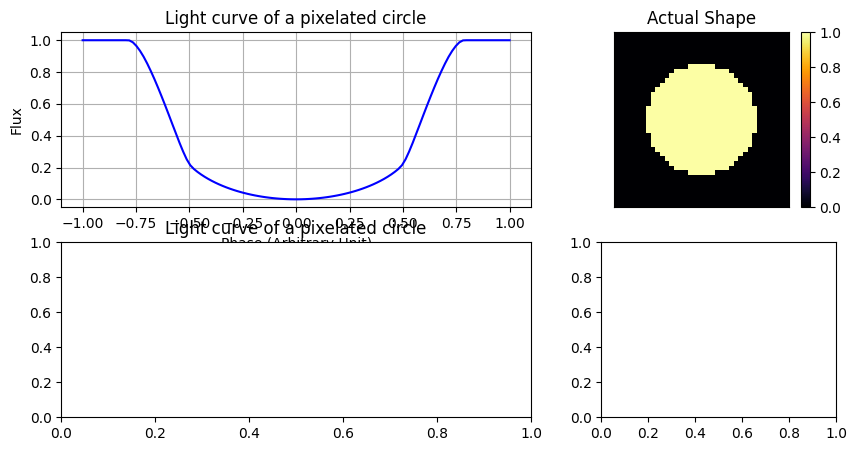

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5),gridspec_kw={'width_ratios': [2,1]})  # 1 row, 3 columns
ph = np.linspace(-1,1,len(test_lc_scaled_append[0]))

# Plot on each subplot
k = int(0) # Index
axes[0][0].set_title('Light curve of a pixelated circle')
axes[0][0].plot(ph, test_lc_scaled_append[k], color='blue')
axes[0][0].grid('on')
axes[0][0].set_ylabel('Flux')
axes[0][0].set_xlabel('Phase (Arbitrary Unit)')

axes[0][1].set_title('Actual Shape')
axes[0][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
img = axes[0][1].imshow(test_shape[k],cmap='inferno')
plt.colorbar(img)


k = 1 # int(1) # Index
axes[1][0].set_title('Light curve of a pixelated circle')
axes[1][0].plot(ph, test_lc_scaled_append[6], color='blue')
axes[1][0].grid('on')
axes[1][0].set_ylabel('Flux')
axes[1][0].set_xlabel('Phase (Arbitrary Unit)')

axes[1][1].set_title('Actual Shape')
axes[1][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
img = axes[1][1].imshow(test_shape[6],cmap='inferno')
plt.colorbar(img)

plt.show()